In [1]:
%pylab inline
import pandas as pd
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
predictions = dict()

for dset in ['nx-f','xf-n','fn-x']:
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial11/9.5a/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly_9.5a']=topX[0:200]

for dset in ['nx-f','xf-n','fn-x']:
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial11/9.5b/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly_9.5b']=topX[0:200]

for dset in ['nx-f','xf-n','fn-x']:
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial11/10a/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly_10a']=topX[0:200]

for dset in ['nx-f','xf-n','fn-x']:
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial11/10b/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly_10b']=topX[0:200]
    

In [3]:
predictions.keys()

dict_keys(['fn-x_poly_10a', 'xf-n_poly_9.5a', 'nx-f_poly_10a', 'fn-x_poly_9.5a', 'fn-x_poly_10b', 'xf-n_poly_9.5b', 'xf-n_poly_10b', 'nx-f_poly_9.5a', 'fn-x_poly_9.5b', 'nx-f_poly_9.5b', 'nx-f_poly_10b', 'xf-n_poly_10a'])

In [4]:
#Define Dummy Variable Encoding
aminoAcidIndex = 'ACEDGFIHKMLNQPSRTWVY'

def getAAVector(letter):
    vector = np.zeros(20);
    vector[aminoAcidIndex.index(letter)]=1
    return  vector

def encodeWithDummyVariables(sequence):
    newArray=[]
    for aa in sequence:
        newArray.append(getAAVector(aa))
    return np.array(newArray).ravel()

In [5]:
predictionSource = []
allSeqs = []

for each in ['nx-f_poly_10a', 'xf-n_poly_9.5a', 'xf-n_poly_10b', 'fn-x_poly_9.5a', 'fn-x_poly_10b', 'fn-x_poly_9.5b', 'xf-n_poly_9.5b', 'nx-f_poly_9.5b', 'fn-x_poly_10a', 'nx-f_poly_9.5a', 'xf-n_poly_10a', 'nx-f_poly_10b']:
    allSeqs.extend(predictions[each])
    predictionSource.extend([each]*len(predictions[each]))

In [6]:
predictionDF = pd.DataFrame({'seq':allSeqs,'constraint':[i[10:] for i in predictionSource],'source':[i[0:9] for i in predictionSource]})

In [7]:
len(predictionDF)

1512

In [8]:
predictionDF[predictionDF['seq'].str.contains('set')]

,constraint,seq,source


In [9]:
cleanPrediction = predictionDF[~predictionDF['seq'].str.contains('set') & 
                               ~predictionDF['seq'].str.contains('Infeasible')].copy()

In [10]:
len(cleanPrediction)

1504

In [11]:
cleanPrediction = cleanPrediction.drop_duplicates(subset=['seq']).copy()

In [12]:

myMatrix = np.array([encodeWithDummyVariables(k) for k in cleanPrediction.seq])


for dset in ['s','t','m','x','f','n']:

    polyModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modelpolyall_"+dset+".pickle",'rb'))
    linearModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modellinearall_"+dset+".pickle",'rb'))


    cleanPrediction[dset+'_poly'] = polyModel.predict(myMatrix)
    cleanPrediction[dset+'_linear'] = linearModel.predict(myMatrix)

    

In [13]:
for dset in ['m','x','f']:

    polyModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modelpolycomboall_"+dset+".pickle",'rb'))
    linearModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modellinearcomboall_"+dset+".pickle",'rb'))


    cleanPrediction[dset+'_combo_poly'] = polyModel.predict(myMatrix)
    cleanPrediction[dset+'_combo_linear'] = linearModel.predict(myMatrix)


In [14]:
cleanPrediction.head()

,constraint,seq,source,s_poly,s_linear,t_poly,t_linear,m_poly,m_linear,x_poly,...,f_poly,f_linear,n_poly,n_linear,m_combo_poly,m_combo_linear,x_combo_poly,x_combo_linear,f_combo_poly,f_combo_linear
0,10a,GQWLRWVAADLVRIADDFHAQY,nx-f_poly,-11.226978,-11.018347,-10.201629,-10.058802,-12.119653,-10.637388,-11.346485,...,-9.966012,-9.936379,-12.478677,-10.768974,-12.528204,-10.669577,-11.242172,-11.283653,-10.212687,-10.002416
1,10a,GQWLRWVIAELIRIADEFHAQY,nx-f_poly,-11.496990,-11.350721,-10.254862,-10.134417,-12.384829,-11.244667,-11.356981,...,-9.972033,-10.056803,-12.419505,-11.430937,-12.775610,-11.392652,-11.630065,-11.706733,-10.364292,-10.117049
2,10a,GQWLRWVVAELIRIADEFHAQY,nx-f_poly,-11.592039,-11.411379,-10.219702,-10.098995,-12.118154,-11.149051,-11.382706,...,-9.937212,-10.043843,-12.348763,-11.360359,-12.518199,-11.307986,-11.580359,-11.761496,-10.293911,-10.060815
3,10a,GQWLRWVAADLIRIADEFHAQR,nx-f_poly,-11.334234,-11.161730,-10.254951,-10.037477,-12.332081,-10.522441,-11.335846,...,-9.961388,-9.920211,-12.304966,-10.530087,-12.584416,-10.472927,-11.345254,-11.352208,-10.278235,-9.998216
4,10a,GQRLIWVVAELIRIADEFHAQY,nx-f_poly,-11.640324,-11.718125,-10.161327,-10.016085,-12.007863,-10.796881,-11.443350,...,-9.925935,-10.062656,-12.282615,-11.079165,-12.506545,-10.994416,-11.772570,-12.132178,-10.271086,-10.001415


In [15]:
import re

def getColor(source):
    myIndex = ['n','f','x']
    myRGB = [0,0,0,0.2]
    
    if(bool(re.findall('-',source))):
        target = re.split('-',source)[0]
        for i in target:
            myRGB[myIndex.index(i)]=1
            
    else:
        myRGB[myIndex.index(source[0])]=1
        
    if(bool(re.findall('poly',source))):
        myRGB[3]=1
        
    return matplotlib.colors.colorConverter.to_rgba(myRGB)

In [16]:
cleanPrediction['color'] = cleanPrediction.apply(lambda x: getColor(x['source']),axis=1)

In [17]:
cleanPrediction['colorhex'] = cleanPrediction.apply(lambda x : matplotlib.colors.rgb2hex(x['color']),axis=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/AdditiveColor.svg/1024px-AdditiveColor.svg.png", width=400>

In [18]:
def plotDotted(ax):
    ax.plot([-16,-4],[-16,-4])


    ax.plot([-16-tenFold,-4-tenFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+tenFold,-4+tenFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.plot([-16-hundredFold,-4-hundredFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+hundredFold,-4+hundredFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.plot([-16-thouFold,-4-thouFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+thouFold,-4+thouFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.vlines(-11.3,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-11.3,-16,-4,linestyles ='-.',color='grey')

    ax.vlines(-10,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-10,-16,-4,linestyles ='-.',color='grey')

    ax.vlines(-9.5,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-9.5,-16,-4,linestyles ='-.',color='grey')



In [19]:
plotSubsetData = cleanPrediction[cleanPrediction.source.str.contains("fn-x|nx-f|xf-n")].copy()

In [20]:
import seaborn as sb

In [21]:
def kcalToKD(i):
    return np.e**(i/ ((1.9872041 * 10**-3)  * (298))) * 10**9

def kdTokcal(i):
    return (1.9872041 * 10**-3)  * (298) * np.log( i/ 10**9)

In [22]:
twoFold = kdTokcal(200) -kdTokcal(100)
tenFold = kdTokcal(2000) -kdTokcal(200)
hundredFold = kdTokcal(20000) -kdTokcal(200)
thouFold = kdTokcal(200000) -kdTokcal(200)


plotSubsetData['xMean'] = plotSubsetData[['s_linear','s_poly','x_linear','x_poly']].mean(axis=1)
plotSubsetData['mMean'] = plotSubsetData[['m_linear','m_poly','n_linear','n_poly']].mean(axis=1)
plotSubsetData['fMean'] = plotSubsetData[['t_linear','t_poly','f_linear','f_poly']].mean(axis=1)


def getXFSpec(row):
    return mean([(row.mMean-row.xMean),(row.mMean-row.fMean)])
def getFMSpec(row):
    return mean([(row.xMean-row.fMean),(row.xMean-row.mMean)])
def getMXSpec(row):
    return mean([(row.fMean-row.mMean),(row.fMean-row.xMean)])

plotSubsetData['xf_Spec'] = plotSubsetData.apply(lambda x: getXFSpec(x),axis=1)
plotSubsetData['fm_Spec'] = plotSubsetData.apply(lambda x: getFMSpec(x),axis=1)
plotSubsetData['mx_Spec'] = plotSubsetData.apply(lambda x: getMXSpec(x),axis=1)

In [23]:
def selectForDiversity2(inputDF,howManySeqs):

    currentSetOfIdx = []

    for i,row in inputDF.iterrows():

        newSeqVector = encodeWithDummyVariables(row.seq)
        
        thisSet = inputDF.loc[currentSetOfIdx]
        myMatrix = np.array([encodeWithDummyVariables(x) for x in thisSet.seq])
        
        if(len(currentSetOfIdx)==0):
            currentSetOfIdx.append(i)
        else:
            addSeq = True
            for j in range(len(myMatrix)):
                #print(myMatrix[j].dot(newSeqVector),i)
                if(myMatrix[j].dot(newSeqVector)>20):
                    addSeq=False
                    break
            
            if(addSeq):
                currentSetOfIdx.append(i)
                #Add until you fill the required number of seqs
            
        
        if(len(currentSetOfIdx)==howManySeqs):
            break
            
    thisSet = inputDF.loc[currentSetOfIdx]        
    return thisSet

In [24]:
conditionA = plotSubsetData['source'].str.contains('xf-n_poly') & (plotSubsetData['constraint']=='10a')
conditionB = plotSubsetData['source'].str.contains('xf-n_poly') & (plotSubsetData['constraint']=='10b')

topXF = pd.concat(
    [selectForDiversity2(plotSubsetData[conditionA].sort_values(by=['xMean','fMean'],ascending=True),5),
     selectForDiversity2(plotSubsetData[conditionB].sort_values(by=['fMean','xMean'],ascending=True),5),
     plotSubsetData.loc[[200]]])

conditionA = plotSubsetData['source'].str.contains('fn-x_poly') & (plotSubsetData['constraint']=='10a')
conditionB = plotSubsetData['source'].str.contains('fn-x_poly') & (plotSubsetData['constraint']=='10b')
topMF = pd.concat(
    [selectForDiversity2(plotSubsetData[conditionB].sort_values(by=['mMean','fMean'],ascending=True),5),
     selectForDiversity2(plotSubsetData[conditionA].sort_values(by=['fMean','mMean'],ascending=True),5)])

conditionA = plotSubsetData['source'].str.contains('nx-f_poly') & (plotSubsetData['constraint']=='10a')
conditionB = plotSubsetData['source'].str.contains('nx-f_poly') & (plotSubsetData['constraint']=='10b')
topXM = pd.concat(
    [selectForDiversity2(plotSubsetData[conditionB].sort_values(by=['xMean','mMean'],ascending=True),5),
     selectForDiversity2(plotSubsetData[conditionA].sort_values(by=['mMean','xMean'],ascending=True),5),
    ])

topDesigns = pd.concat([topXF,topXM]) # topMF


In [25]:
topXM.mx_Spec

1323    1.328913
1316    1.354170
1313    1.398373
1315    1.060847
1386    1.590590
1       1.543404
15      1.426432
119     1.598164
125     1.396355
62      1.370845
Name: mx_Spec, dtype: float64

In [26]:
topXM.constraint

1323    10b
1316    10b
1313    10b
1315    10b
1386    10b
1       10a
15      10a
119     10a
125     10a
62      10a
Name: constraint, dtype: object

In [27]:
topXF.constraint

1113     10a
1116     10a
1135     10a
1118     10a
1128     10a
320      10b
239      10b
234      10b
237      10b
252      10b
200     9.5a
Name: constraint, dtype: object

In [28]:
topDesigns.to_pickle("/home/vxue/data/sort_specificity/design_y/top21_redesign_max1/combo_top5.pickle")

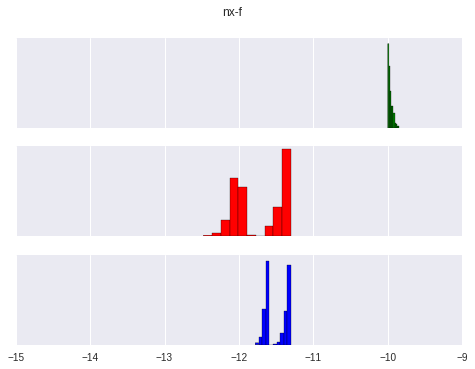

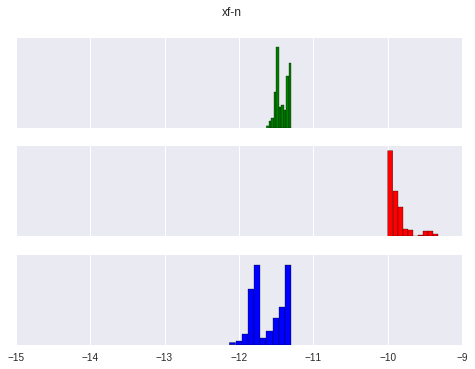

In [29]:
figure()
fig,ax = plt.subplots(3,1)
ax[0].hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].f_poly,color='green')
ax[0].set_xlim(-15,-9)
ax[0].set_xticklabels([])
ax[0].set_yticks([])
ax[1].hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].n_poly,color='red')
ax[1].set_xlim(-15,-9)
ax[1].set_xticklabels([])
ax[1].set_yticks([])
ax[2].hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].x_poly,color='blue')
ax[2].set_xlim(-15,-9)
ax[2].set_yticks([])
suptitle('nx-f')


fig,ax = plt.subplots(3,1)
ax[0].hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].f_poly,color='green')
ax[0].set_xlim(-15,-9)
ax[0].set_xticklabels([])
ax[0].set_yticks([])
ax[1].hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].n_poly,color='red')
ax[1].set_xlim(-15,-9)
ax[1].set_xticklabels([])
ax[1].set_yticks([])
ax[2].hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].x_poly,color='blue')
ax[2].set_xlim(-15,-9)
ax[2].set_yticks([])
suptitle('xf-n')

In [30]:
def plotGrid(x,y,x2,y2,x3,y3,thisTitle):
    rangeMin = -15
    rangeMax = -8

    fig,ax = plt.subplots(3,2,figsize=(20,30))
    ax[0][0].scatter(plotSubsetData[x+'_linear'],plotSubsetData[y+'_linear'],c=list(plotSubsetData['color']))
    ax[0][0].set_xlabel(x + " Linear")
    ax[0][0].set_ylabel(y + " Linear")
    plotDotted(ax[0][0])
    ax[0][0].set_xlim(rangeMin,rangeMax)
    ax[0][0].set_ylim(rangeMin,rangeMax)

    ax[0][1].scatter(plotSubsetData[x+'_poly'],plotSubsetData[y+'_poly'],c=list(plotSubsetData['color']))
    ax[0][1].set_xlabel(x + " Poly")
    ax[0][1].set_ylabel(y + " Poly")
    plotDotted(ax[0][1])
    ax[0][1].set_xlim(rangeMin,rangeMax)
    ax[0][1].set_ylim(rangeMin,rangeMax)

    ax[1][0].scatter(plotSubsetData[x2+'_linear'],plotSubsetData[y2+'_linear'],c=list(plotSubsetData['color']))
    ax[1][0].set_xlabel(x2 + " Linear")
    ax[1][0].set_ylabel(y2 + " Linear")
    plotDotted(ax[1][0])
    ax[1][0].set_xlim(rangeMin,rangeMax)
    ax[1][0].set_ylim(rangeMin,rangeMax)

    ax[1][1].scatter(plotSubsetData[x2+'_poly'],plotSubsetData[y2+'_poly'],c=list(plotSubsetData['color']))
    ax[1][1].set_xlabel(x2 + " Poly")
    ax[1][1].set_ylabel(y2 + " Poly")
    plotDotted(ax[1][1])
    ax[1][1].set_xlim(rangeMin,rangeMax)
    ax[1][1].set_ylim(rangeMin,rangeMax)

    
    ax[2][0].scatter(plotSubsetData[x3+'_linear'],plotSubsetData[y3+'_linear'],c=list(plotSubsetData['color']))
    ax[2][0].set_xlabel(x3 + " Linear")
    ax[2][0].set_ylabel(y3 + " Linear")
    plotDotted(ax[2][0])
    ax[2][0].set_xlim(rangeMin,rangeMax)
    ax[2][0].set_ylim(rangeMin,rangeMax)

    ax[2][1].scatter(plotSubsetData[x3+'_poly'],plotSubsetData[y3+'_poly'],c=list(plotSubsetData['color']))
    ax[2][1].set_xlabel(x3 + " Poly")
    ax[2][1].set_ylabel(y3 + " Poly")
    plotDotted(ax[2][1])
    ax[2][1].set_xlim(rangeMin,rangeMax)
    ax[2][1].set_ylim(rangeMin,rangeMax)
    

    plt.setp(ax, xticks=range(rangeMin,rangeMax), xticklabels = ["%0.3f \n%d"  % (kcalToKD(i),i) for i in range(rangeMin,rangeMax)],
                 yticks=range(rangeMin,rangeMax), yticklabels = ["%0.3f \n%d"  % (kcalToKD(i),i) for i in range(rangeMin,rangeMax)])
    print()
    suptitle(thisTitle, size=30,y=1.05)

    ax[0][0].scatter(topDesigns[x+'_linear'],topDesigns[y+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[0][1].scatter(topDesigns[x+'_poly'],topDesigns[[y+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    ax[1][0].scatter(topDesigns[x2+'_linear'],topDesigns[y2+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[1][1].scatter(topDesigns[x2+'_poly'],topDesigns[[y2+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    ax[2][0].scatter(topDesigns[x3+'_linear'],topDesigns[y3+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[2][1].scatter(topDesigns[x3+'_poly'],topDesigns[[y3+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    plt.tight_layout()


In [31]:
# %load ../PyScripts/makeLogoFromList.py
#SVM_Ranking_29
from weblogolib import *
from IPython.display import Image


def makeLogoFromList(sequences):
    myFile = open("/tmp/seqlogo",'w')
    count = 0
    for each in sequences:
        if("*" not in each and "X" not in each):
            myFile.write(each+"\n")
            #myFile.write("\n")
        count+=1
        #if (count>10000):
        #    break
    myFile.close()
    
    myFile=open("/tmp/seqlogo",'r')
    seqs = read_seq_data(myFile)
    data = LogoData.from_seqs(seqs)
    options = LogoOptions()
    options.fineprint=""
    options.resolution=300
    options.fontsize=8
    #options.unit_name="bits"
    options.unit_name="probability"
    myFormat = LogoFormat(data, options)
    return png_formatter(data,myFormat)

temp = makeLogoFromList(['AATCGA'])
myFile=open("/tmp/seqlogo",'r')
seqs = read_seq_data(myFile)   
data = LogoData.from_seqs(seqs)


In [32]:
plotSubsetData = plotSubsetData[~(plotSubsetData['source']=='fn-x_poly')]

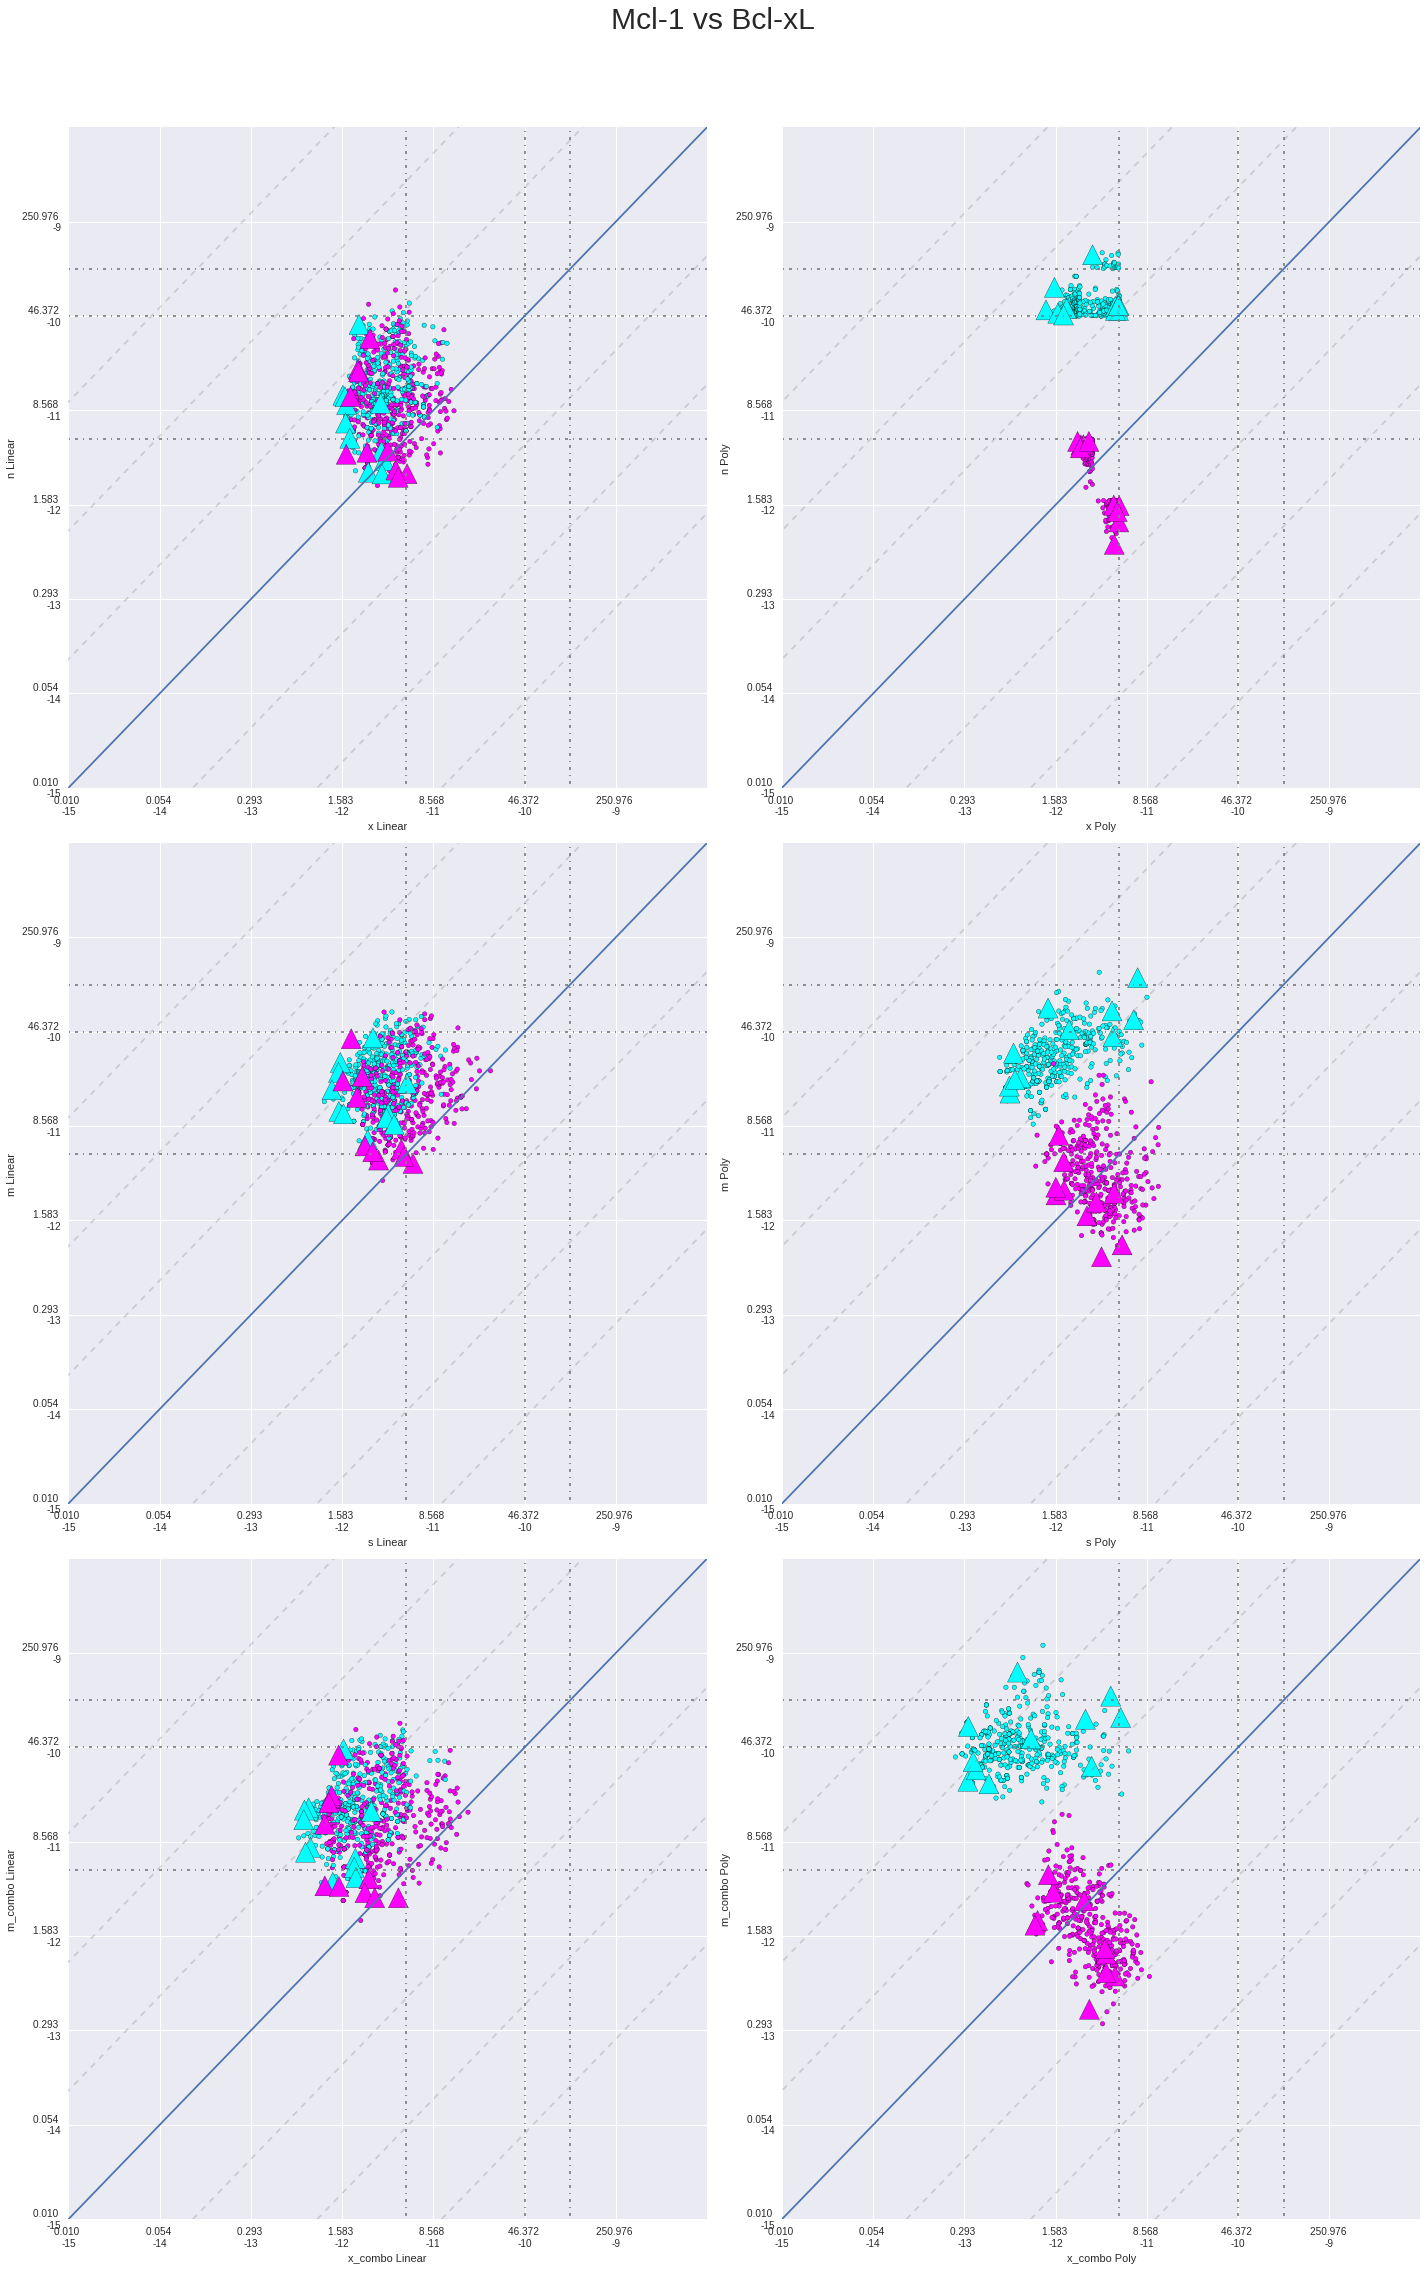

In [51]:

plotGrid('x','n','s','m','x_combo','m_combo',"Mcl-1 vs Bcl-xL")

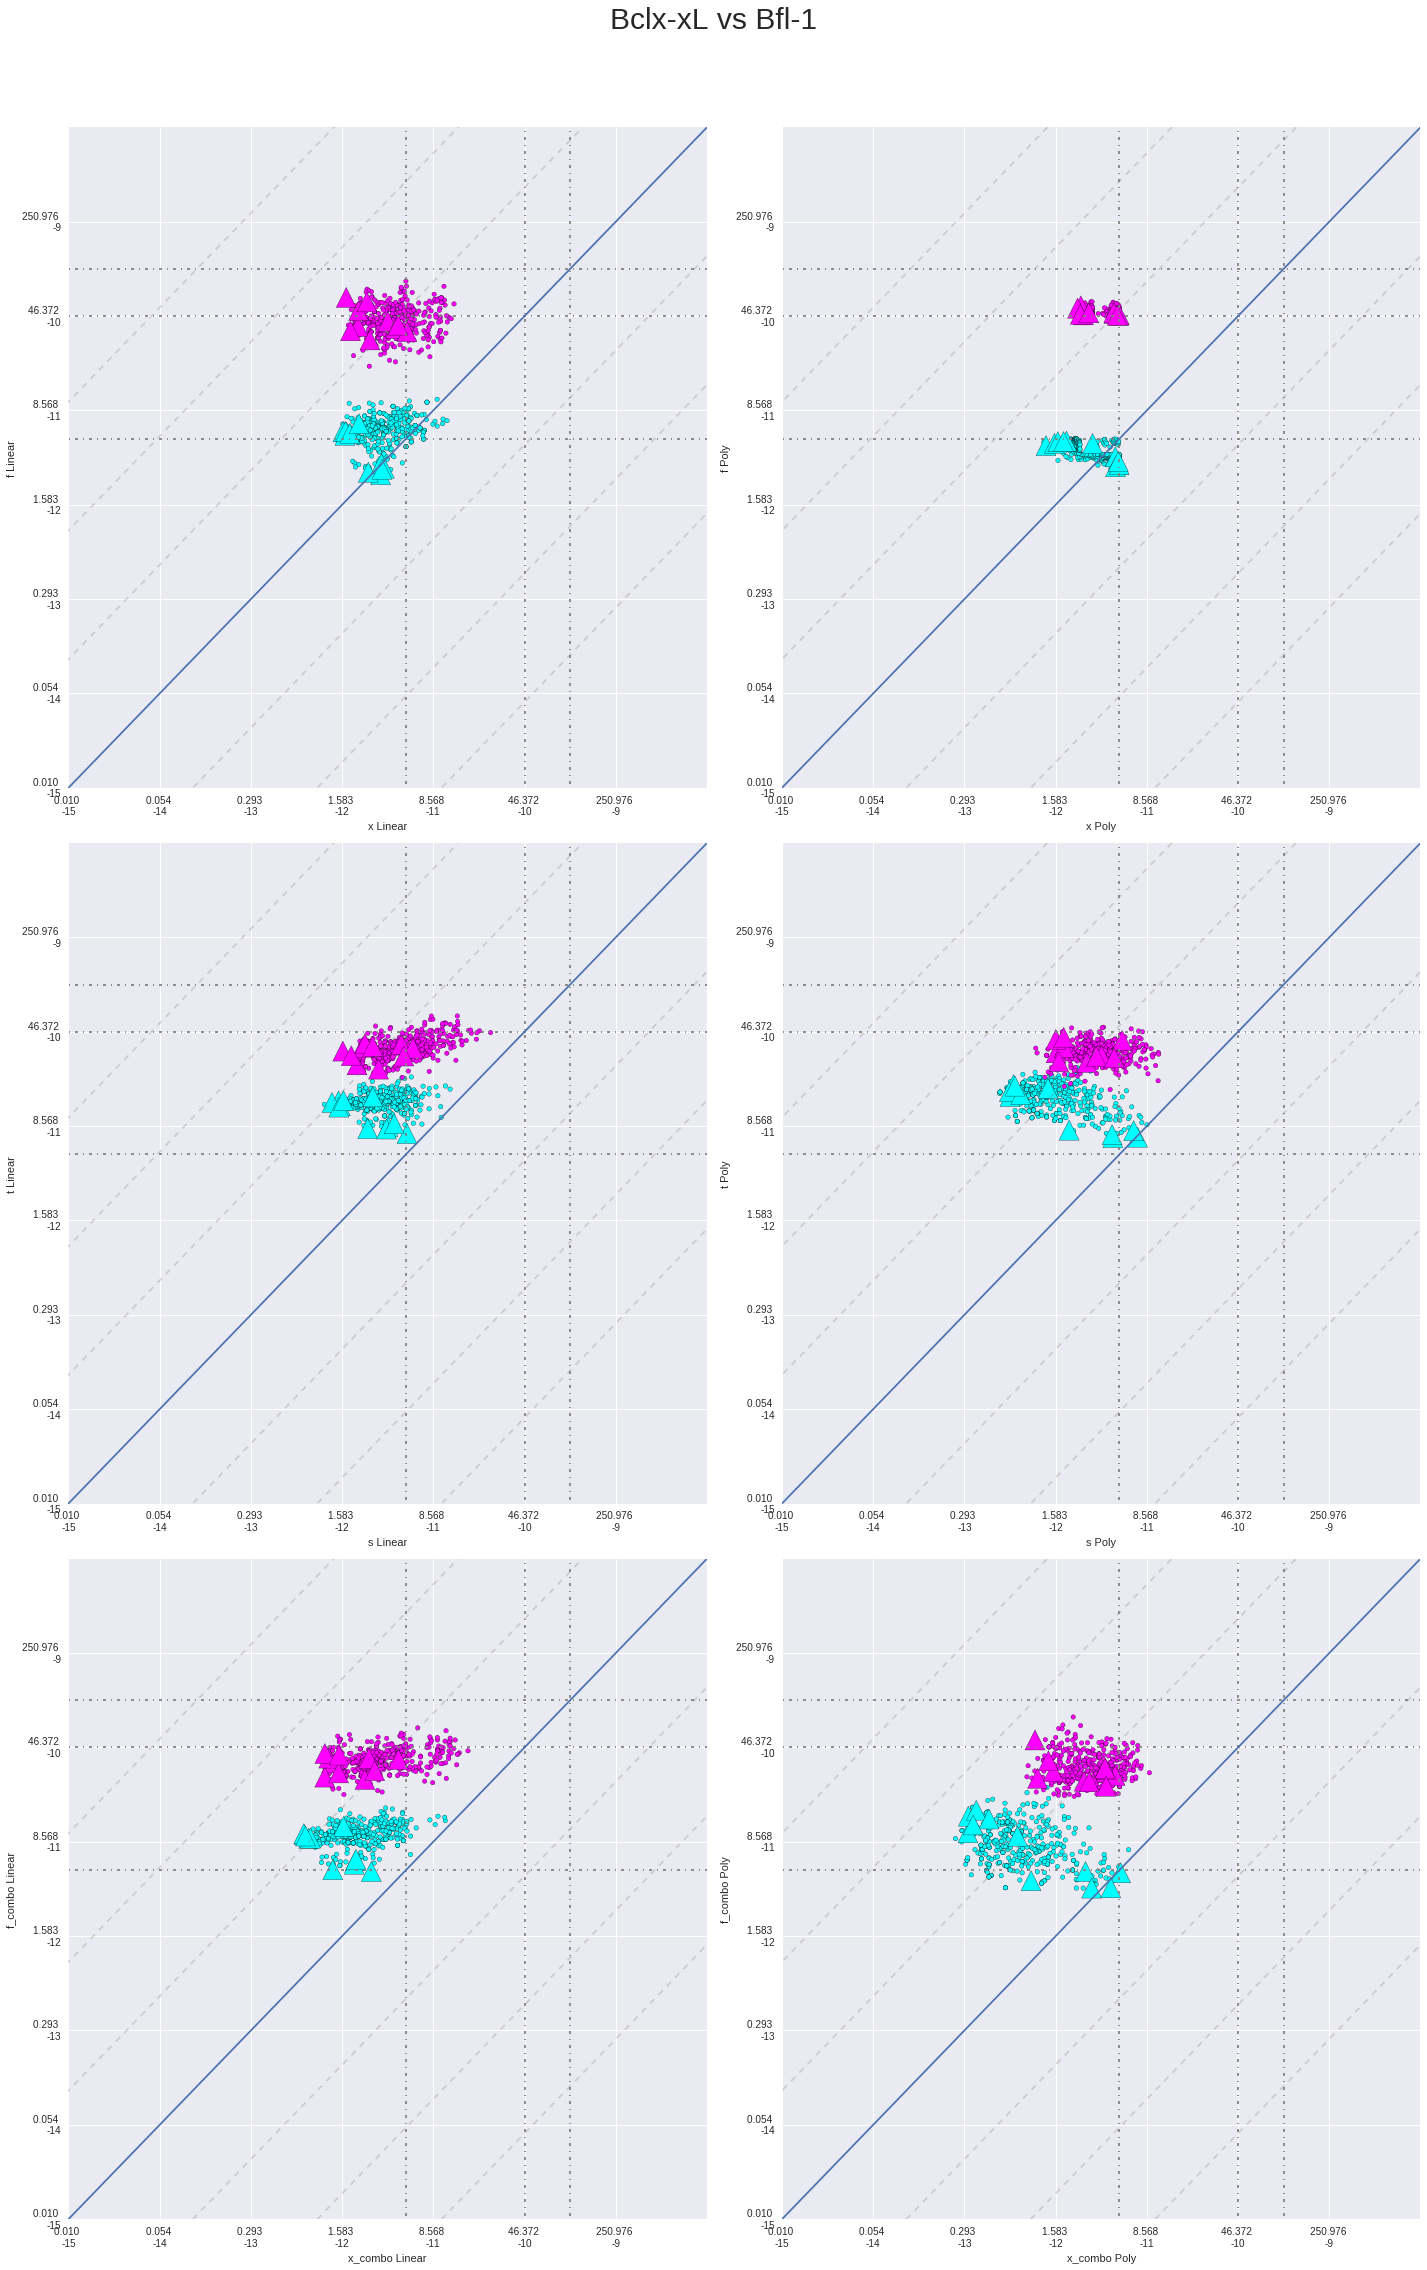

In [33]:
plotGrid('x','f','s','t','x_combo','f_combo',"Bclx-xL vs Bfl-1")

In [35]:
plotSubsetData.source.unique()

array(['nx-f_poly', 'xf-n_poly'], dtype=object)

In [36]:
def plotGridAverage(x,y):
    rangeMin = -15
    rangeMax = -8

    fig,ax = plt.subplots(figsize=(10,10))
    ax.scatter(plotSubsetData[x+'Mean'],plotSubsetData[y+'Mean'],c=list(plotSubsetData['color']))
    ax.set_xlabel(x + " Mean")
    ax.set_ylabel(y + " Mean")
    plotDotted(ax)
    ax.set_xlim(rangeMin,rangeMax)
    ax.set_ylim(rangeMin,rangeMax)

    
    #ax.scatter(topDesigns[x+'_linear'],topDesigns[y+'_linear'],c=list(topDesigns['color']),s=400,marker='^')

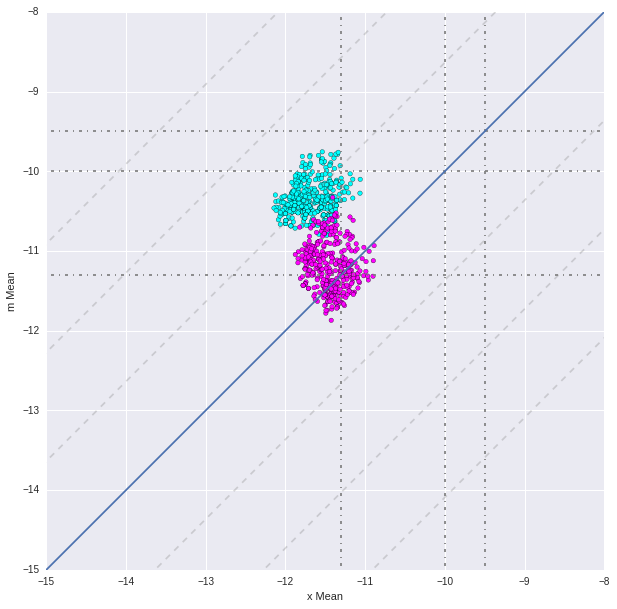

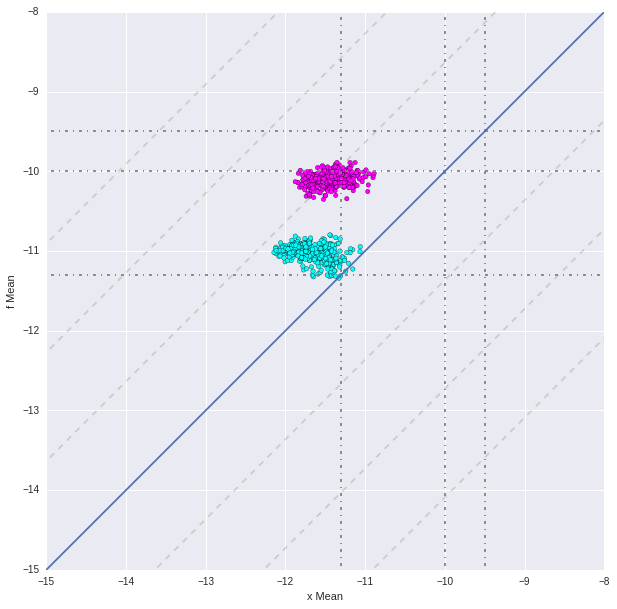

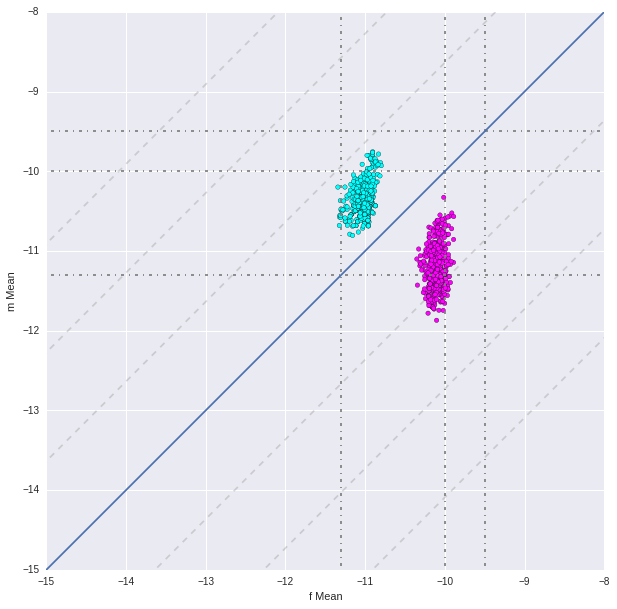

In [37]:
plotGridAverage('x','m')
plotGridAverage('x','f')
plotGridAverage('f','m')


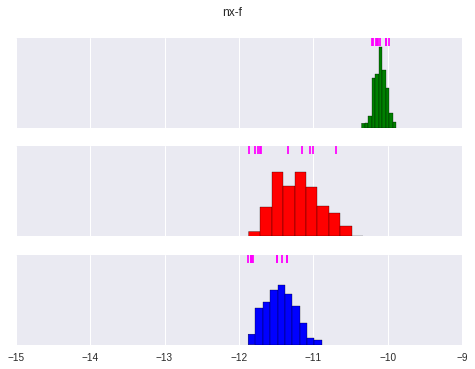

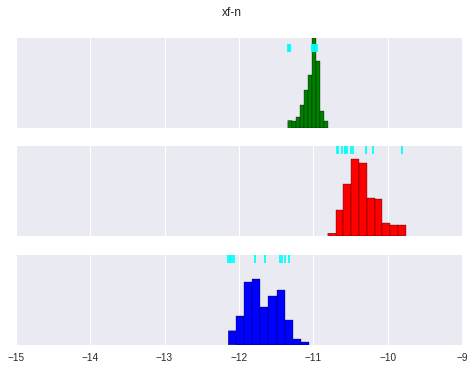

In [38]:
figure()
fig,ax = plt.subplots(3,1)
ax[0].hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].fMean,color='green')
ax[0].set_xlim(-15,-9)
ax[0].set_xticklabels([])
ax[0].set_yticks([])
ax[1].hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].mMean,color='red')
ax[1].set_xlim(-15,-9)
ax[1].set_xticklabels([])
ax[1].set_yticks([])
ax[2].hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].xMean,color='blue')
ax[2].set_xlim(-15,-9)
ax[2].set_yticks([])

topDesignsSubset = topDesigns[topDesigns.source=='nx-f_poly']
ax[0].vlines(topDesignsSubset['fMean'],100,110,color=list(topDesignsSubset['color']))
ax[1].vlines(topDesignsSubset['mMean'],100,110,color=list(topDesignsSubset['color']))
ax[2].vlines(topDesignsSubset['xMean'],100,110,color=list(topDesignsSubset['color']))

suptitle('nx-f')

 


fig,ax = plt.subplots(3,1)
ax[0].hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].fMean,color='green')
ax[0].set_xlim(-15,-9)
ax[0].set_xticklabels([])
ax[0].set_yticks([])
ax[1].hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].mMean,color='red')
ax[1].set_xlim(-15,-9)
ax[1].set_xticklabels([])
ax[1].set_yticks([])
ax[2].hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].xMean,color='blue')
ax[2].set_xlim(-15,-9)
ax[2].set_yticks([])

topDesignsSubset = topDesigns[topDesigns.source=='xf-n_poly']
ax[0].vlines(topDesignsSubset['fMean'],100,110,color=list(topDesignsSubset['color']))
ax[1].vlines(topDesignsSubset['mMean'],100,110,color=list(topDesignsSubset['color']))
ax[2].vlines(topDesignsSubset['xMean'],100,110,color=list(topDesignsSubset['color']))


suptitle('xf-n')



In [49]:
len(cleanPrediction[cleanPrediction.source.str.contains("xf-n_poly")].seq)

421

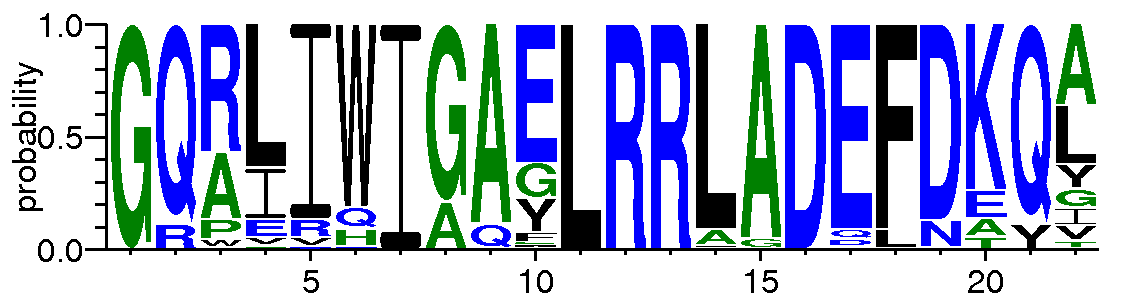

In [39]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("xf-n_poly")].seq))

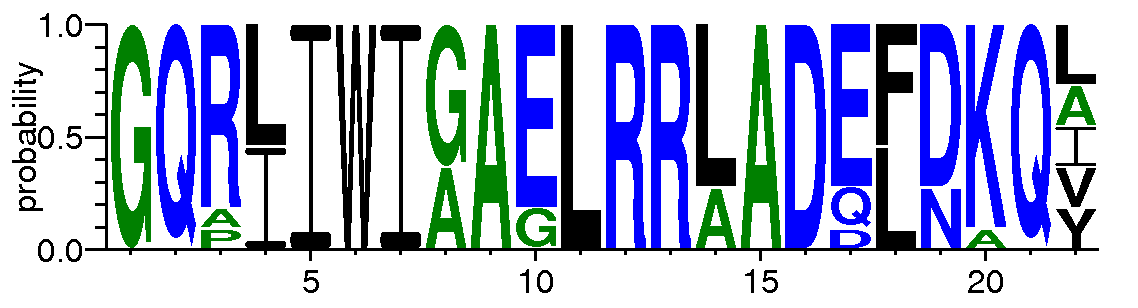

In [40]:
Image(makeLogoFromList(topXF.seq))

In [41]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topXF.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 20, 20, 20, 18, 16, 17, 15, 13, 14, 18],
       [ 0,  0, 20, 19, 20, 18, 19, 17, 15, 16, 20],
       [ 0,  0,  0, 20, 19, 16, 18, 16, 14, 15, 20],
       [ 0,  0,  0,  0, 18, 15, 18, 15, 13, 14, 18],
       [ 0,  0,  0,  0,  0, 16, 18, 16, 15, 17, 19],
       [ 0,  0,  0,  0,  0,  0, 19, 19, 17, 18, 18],
       [ 0,  0,  0,  0,  0,  0,  0, 19, 17, 18, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20, 20, 16],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [42]:
topXF.seq

1113    GQALIWIGAELRRLADEFNKQL
1116    GQRLIWIGAELRRLADEFDKQL
1135    GQRLIWIGAELRRLADEFNKQA
1118    GQPLIWIGAELRRLADEFNKQV
1128    GQRLIWIGAELRRLADDFDKQY
320     GQRIIWIAAGLRRLADELDKQL
239     GQRIIWIGAELRRLADELDKQV
234     GQRIIWIAAELRRAADELDKQI
237     GQRIIWIAAELRRAADQLDAQI
252     GQRIIWIAAELRRAADQLDKQY
200     GQRLIWIGAGLRRLADEFDKQA
Name: seq, dtype: object

In [50]:
len(cleanPrediction[cleanPrediction.source.str.contains("nx-f_poly")].seq)

400

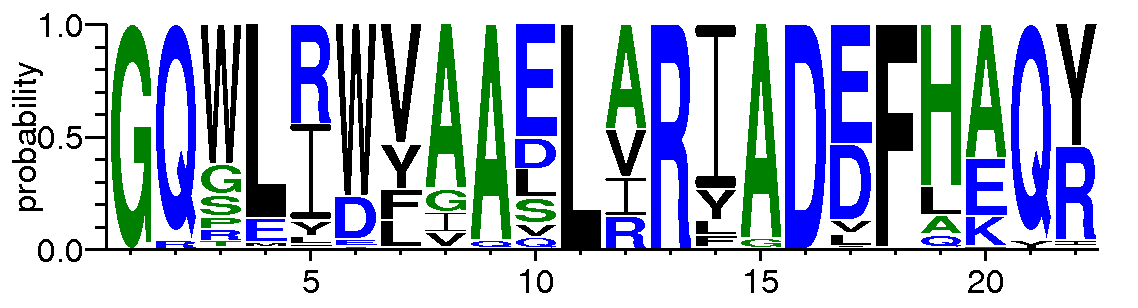

In [43]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("nx-f_poly")].seq))

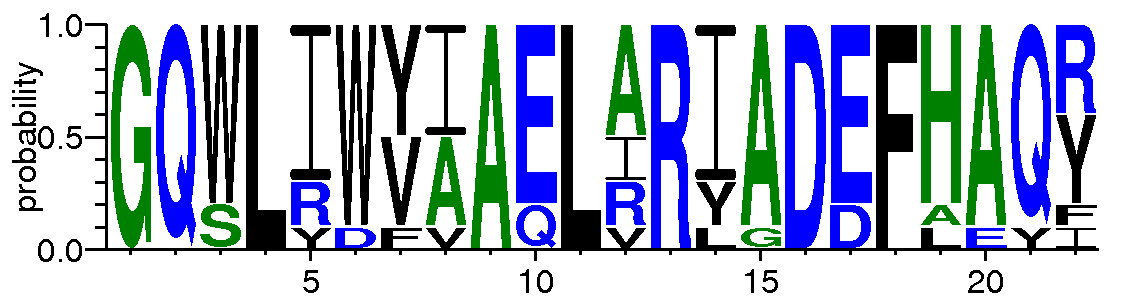

In [44]:
Image(makeLogoFromList(topXM.seq))

In [45]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topXM.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 19, 17, 19, 17, 16, 16, 18, 16, 14],
       [ 0,  0, 17, 17, 16, 15, 17, 17, 15, 13],
       [ 0,  0,  0, 18, 17, 17, 14, 19, 15, 14],
       [ 0,  0,  0,  0, 14, 16, 16, 16, 15, 12],
       [ 0,  0,  0,  0,  0, 17, 14, 18, 16, 17],
       [ 0,  0,  0,  0,  0,  0, 16, 19, 19, 15],
       [ 0,  0,  0,  0,  0,  0,  0, 15, 15, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [46]:
topXM.seq

1323    GQWLIWYAAQLARIADEFHAQR
1316    GQWLIWYAAELARLADDFHAQR
1313    GQWLIWYIAELRRYADEFHAQI
1315    GQWLIWVAAQLRRYADEFHAQR
1386    GQSLIWYIAELARIADEFAAQY
1       GQWLRWVIAELIRIADEFHAQY
15      GQWLYWVAAELVRIADDFLAQR
119     GQWLIWYIAELIRIADEFHAQF
125     GQWLRDVVAELARIADEFHAQY
62      GQSLIWFIAELARIGDEFHEYY
Name: seq, dtype: object

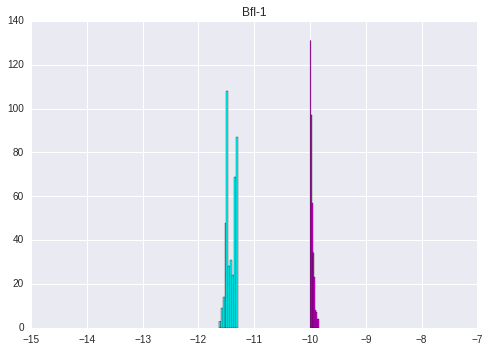

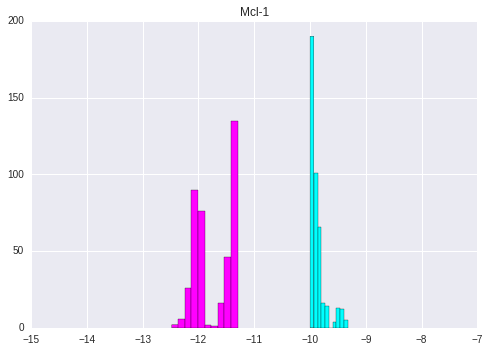

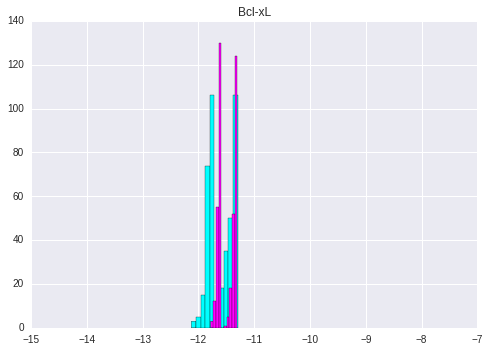

In [47]:
figure()
hist(plotSubsetData[plotSubsetData.source=='fn-x_poly'].f_poly,color='yellow')
hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].f_poly,color='aqua')
hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].f_poly,color='magenta')
xlim(-15,-7)
title("Bfl-1")
figure()
hist(plotSubsetData[plotSubsetData.source=='fn-x_poly'].n_poly,color='yellow')
hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].n_poly,color='aqua')
hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].n_poly,color='magenta')
xlim(-15,-7)
title("Mcl-1")
figure()
hist(plotSubsetData[plotSubsetData.source=='fn-x_poly'].x_poly,color='yellow')
hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].x_poly,color='aqua')
hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].x_poly,color='magenta')
xlim(-15,-7)
title("Bcl-xL")
